<a href="https://colab.research.google.com/github/DivyaNarayan0613/Cardio/blob/main/Logistic_Encryption_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



The logistic map instead uses a nonlinear difference equation to look at discrete time steps. It’s called the logistic map because it maps the population value at any time step to its value at the next time step.

The basic formula is: (X_t+1) = r.X_t.(1 - X_t)

For this implementation we have included key mixing. The initial values of the chaos map is recalculated after every pixel encryption based on the previous encryption value as well as the key value.


Download the image

In [ ]:
# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png



--2022-11-02 07:57:51--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 172.253.63.139, 172.253.63.138, 172.253.63.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6nns43kbhkdla20ag9slg8tcfvq2nvp6/1667375850000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=a3b5e04e-4f85-4f4e-8030-59c5ebc98203 [following]
--2022-11-02 07:57:51--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6nns43kbhkdla20ag9slg8tcfvq2nvp6/1667375850000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=a3b5e04e-4f85-4f4e-8030-59c5ebc98203
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to doc-08

# Import the required packages

In [ ]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

The input image is converted into a matrix using the pixels. The size of the image with width and height is entered into the matrix and each and every value of the pixel is the data inside the matrix. The intensity of the pixels varies from 0 to 255.

The below lines of code provides the function to get image matrix from pixel access object.

The following script loads an image, accesses one pixel from it, then changes it in terms of width and height


In [ ]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1]

In [ ]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0]#, image_size[1]

Function to do Logistic Encryption on the Image

In [ ]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)

    imageMatrix,dimension, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimension, dimension))
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

Function to do decryption on the encrypted image

In [ ]:
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y

    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix, dimension, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

Original Image with Key

In [ ]:
image = "HorizonZero"
ext = ".png"
key = "abcdefghijklm"

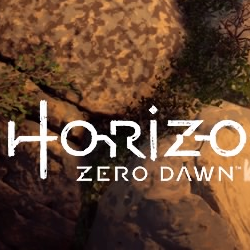

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)

In [ ]:
img.shape

(250, 250, 3)

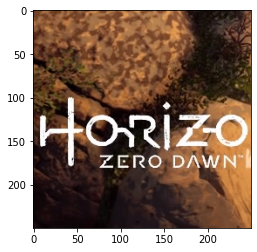

In [ ]:
img1=img.reshape(250,750)

pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')



Encrypted Image

In [ ]:
import time
start_time=time.time()

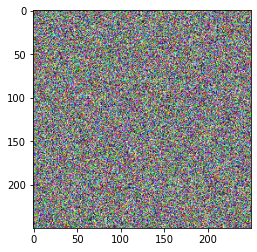

In [ ]:
LogisticEncryption(image + ext, key)
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)

Time:  0.7191202640533447


In [ ]:
from numpy import asarray
logEnc=asarray(im)

In [ ]:
logEnc

array([[[136, 215, 204],
        [157, 106,  88],
        [  7,  64, 201],
        ...,
        [ 71,  93, 122],
        [ 42,  16, 116],
        [144, 115, 200]],

       [[118, 112,  78],
        [219, 119,  88],
        [ 99, 156, 111],
        ...,
        [113,   0,  14],
        [243, 199, 116],
        [157, 128, 144]],

       [[107,  87, 195],
        [227, 232,  32],
        [202,  39,  22],
        ...,
        [233,  64,  76],
        [200, 185,  19],
        [113,  38, 191]],

       ...,

       [[199, 211,  84],
        [154, 243,  23],
        [ 64, 234, 175],
        ...,
        [225,  78,  62],
        [ 14,  22, 106],
        [ 36, 203, 215]],

       [[ 68,  75, 215],
        [ 21, 172, 141],
        [186,  33, 247],
        ...,
        [126,  34, 134],
        [233,  44, 132],
        [123, 159, 183]],

       [[194, 250, 189],
        [ 10, 163, 133],
        [110, 102,  95],
        ...,
        [ 78, 119, 207],
        [  3, 135,  19],
        [ 66, 123,  23]]

In [ ]:
logEnc.shape

(250, 250, 3)

In [ ]:
logEnc1=logEnc.reshape(250,750)

The following lines of code is to design a dense neural network. This is a sequential model with input dimension of 750 and relu activation functions.
Performance metrics considered in this model is 'accuracy' with 'adam' optimizer and 'categorical_crossentropy'as the loss function.

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
# Deep Learning Function
def deepml_model():
    # Model Creation
    deepml = Sequential()
    deepml.add(Dense(15, input_dim=750, activation='relu'))
    deepml.add(Dense(750, activation='relu'))
    # Model Compilation
    deepml.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return deepml

In [ ]:
img1.shape

(250, 750)

The image is converted to arrays, those array are made into batches of 5 with 100 epochs. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass: An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network

In [ ]:
history=deepml_model().fit(img1,logEnc1,batch_size=5,epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 915841.9375 - accuracy: 0.0040
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 844273.4375 - accuracy: 0.0040
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 840790.2500 - accuracy: 0.0040
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 840399.8125 - accuracy: 0.0040
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 839273.3750 - accuracy: 0.0000e+00
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 839178.1875 - accuracy: 0.0000e+00
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 839135.1250 - accuracy: 0.0000e+00
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 839083.8750 - accuracy: 0.0000e+00
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 839058.6875 - accuracy: 0.0000e+00
Epoch 10/100
50/50 [========================

In [ ]:
result=deepml_model().evaluate(img1,logEnc1)

8/8 [==============================] - 0s 2ms/step - loss: 1051523.6250 - accuracy: 0.0040


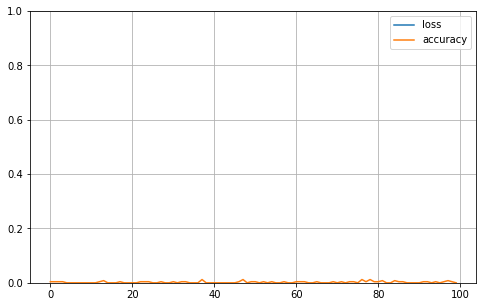

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

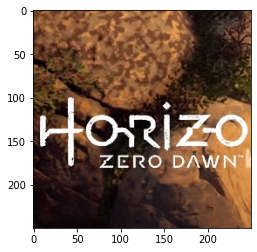

In [ ]:

LogisticDecryption(image + "_LogisticEnc.png", key)
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))



In [ ]:
from numpy import asarray
logDe=asarray(im)

In [ ]:
logDe

array([[[143,  66,  75],
        [102,  57,  36],
        [112,  66,  43],
        ...,
        [111,  76,  57],
        [ 97,  62,  42],
        [100,  63,  44]],

       [[ 93,  48,  25],
        [102,  57,  36],
        [112,  66,  42],
        ...,
        [108,  71,  52],
        [102,  64,  43],
        [106,  68,  45]],

       [[102,  60,  38],
        [110,  65,  42],
        [109,  63,  37],
        ...,
        [117,  75,  53],
        [115,  70,  47],
        [117,  73,  48]],

       ...,

       [[ 25,  10,  15],
        [ 30,  14,  17],
        [ 32,  17,  20],
        ...,
        [196, 129,  76],
        [188, 121,  68],
        [179, 112,  59]],

       [[ 23,   8,  13],
        [ 27,  11,  14],
        [ 29,  14,  17],
        ...,
        [190, 123,  71],
        [185, 118,  66],
        [177, 110,  58]],

       [[ 21,   6,  11],
        [ 24,   8,  11],
        [ 25,  10,  13],
        ...,
        [185, 118,  66],
        [182, 115,  63],
        [175, 108,  56]]

In [ ]:
logDe.shape

(250, 250, 3)

In [ ]:
logDe1=logDe.reshape(250,750)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
# Deep Learning Function
def deepml_model():
    # Model Creation
    deepml = Sequential()
    deepml.add(Dense(15, input_dim=750, activation='relu'))
    deepml.add(Dense(750, activation='relu'))
    # Model Compilation
    deepml.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return deepml

In [ ]:
history=deepml_model().fit(logEnc1,logDe1,batch_size=5,epochs=100)

Epoch 1/100
50/50 [==============================] - 2s 8ms/step - loss: 550825.6875 - accuracy: 0.0080
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 507845.4688 - accuracy: 0.0320
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 498068.3438 - accuracy: 0.0400
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 496629.5000 - accuracy: 0.0280
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 496084.9375 - accuracy: 0.0280
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 495864.0625 - accuracy: 0.0440
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 495822.6250 - accuracy: 0.0280
Epoch 8/100
50/50 [==============================] - 0s 6ms/step - loss: 495695.2500 - accuracy: 0.0360
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 495644.7812 - accuracy: 0.0320
Epoch 10/100
50/50 [==============================] - 0s 4ms/ste

In [ ]:
result=deepml_model().evaluate(logEnc1,logDe1)

8/8 [==============================] - 0s 2ms/step - loss: 644360.2500 - accuracy: 0.0000e+00


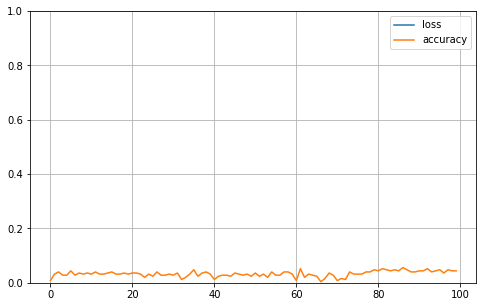

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Point to be observed: Since we are working with only single image, loss is too high and accuracy is negligible when it is fed to the deep neural network. Performance of the training improves when the network is trained with enough large datasets.

In [ ]:
# Downloading lena.bmp
!wget https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
!mv uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069 lena.bmp

--2022-11-02 07:58:51--  https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
Resolving drive.google.com (drive.google.com)... 172.253.63.138, 172.253.63.101, 172.253.63.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lrs99pemnj8r42cibaqacrd85a7b4b4s/1667375925000/05356688754188258246/*/19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069?uuid=6fcc7587-1b49-4b45-b465-790e9a855787 [following]
--2022-11-02 07:58:51--  https://doc-10-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lrs99pemnj8r42cibaqacrd85a7b4b4s/1667375925000/05356688754188258246/*/19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069?uuid=6fcc7587-1b49-4b45-b465-790e9a855787
Resolving doc-10-40-docs.googleusercontent.com (doc-10-40-docs.googleusercontent.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to doc-10

In [ ]:


image = "lena"
ext = ".bmp"
key = "abcdefghijklm"

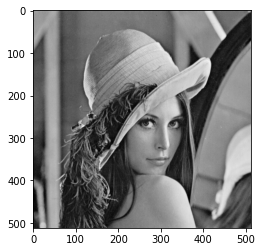

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')


# **Histogram Analysis**

The ciphertext image histogram analysis is one of the most straight-forward methods ofillustrating the image encryption quality. A good image encryption method tends to encrypt a plaintext image to a random incomprehensible form. Thus a good image encyption technique generates a cipher image that has a uniformly distributed intensity histogram.


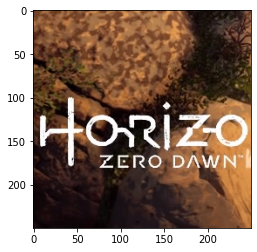

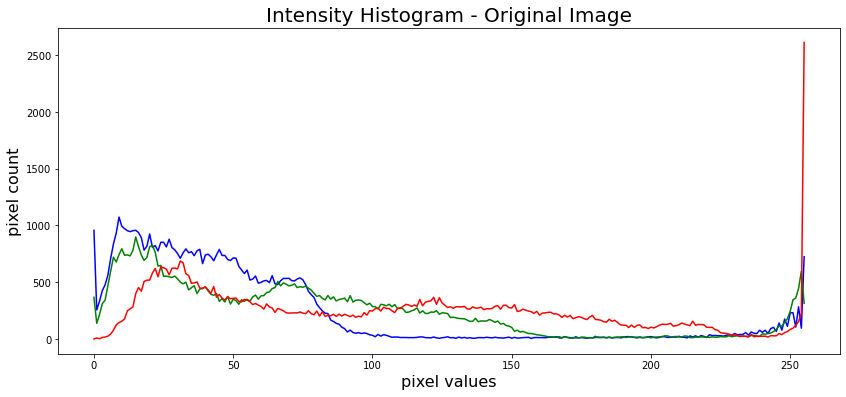

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

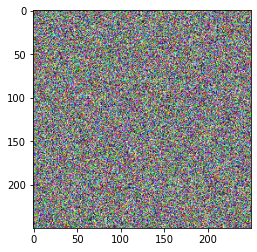

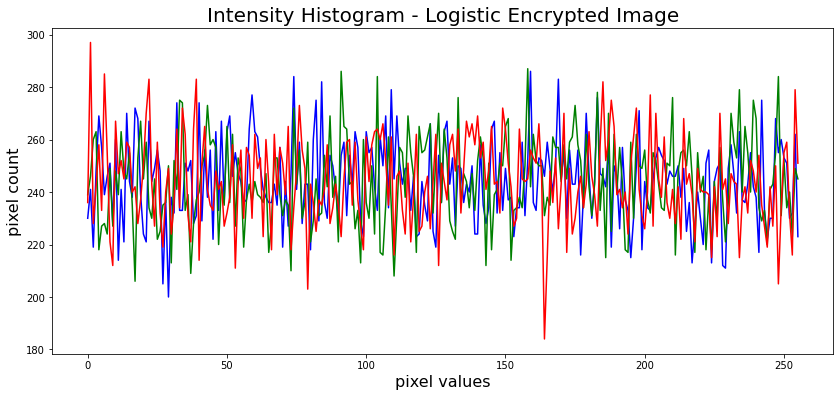

In [ ]:


image = "HorizonZero_LogisticEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Logistic Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()



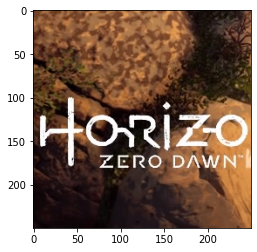

In [ ]:


image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))




# **Adjacent Pixel Auto-Correlation**

Since images exhibit high information redundancy, it is desirable to have an encryption algorithm that breaks this redundancy. Thus as a metric of encryption performance we find the correlation between adjacent pixels in a direction (Horizontal, Vertical or Diagonal). We have considered the Horizontal direction.

1024 random pixels are picked up from the image and its correlation between it's rightmost neighbour is found and plotted. For a good algorithm, the correlation plot should appear random with no discernable pattern


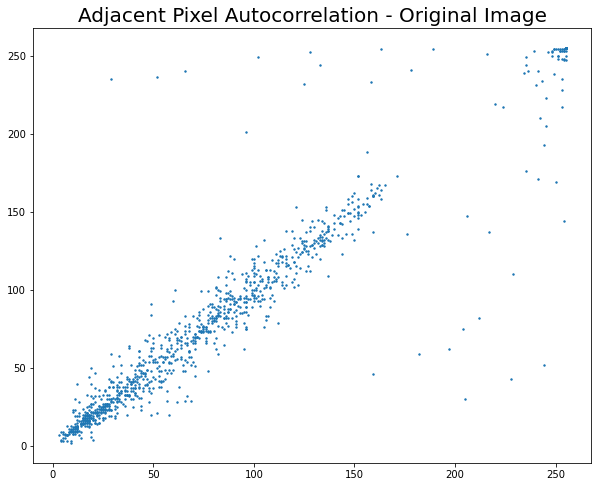

In [ ]:


image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()



# Since images exhibit high information redundancy, it is desirable to have an encryption algorithm that breaks this redundancy. Thus as a metric of encryption performance we find the correlation between adjacent pixels in a direction (Horizontal, Vertical or Diagonal). We have considered the Horizontal direction.

# 1024 random pixels are picked up from the image and its correlation between it's rightmost neighbour is found and plotted. For a good algorithm, the correlation plot should appear random with no discernable pattern

250


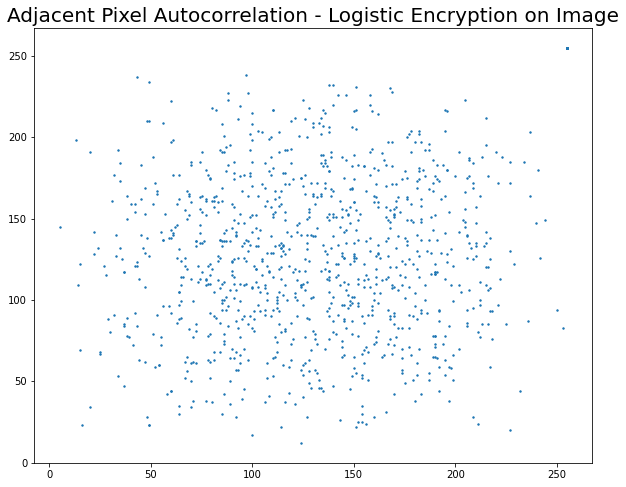

In [ ]:
image = "HorizonZero_LogisticEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Logistic Encryption on Image', fontsize=20)
plt.show()

# **Key sensitivity**

Original image

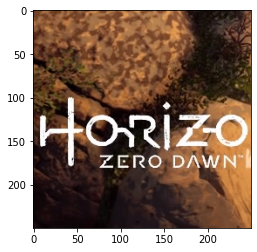

In [ ]:


image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))



Encrypt the image with key "supersecretke"

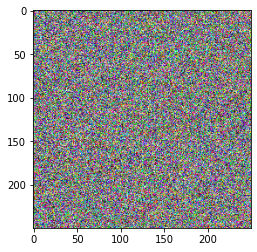

In [ ]:
LogisticEncryption(image + ext, key = "supersecretke")
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

Decrypt with the key "supersupersdd"

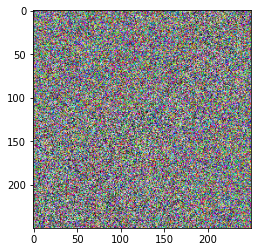

In [ ]:


LogisticDecryption(image + "_LogisticEnc.png", "supersupersdd")
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))



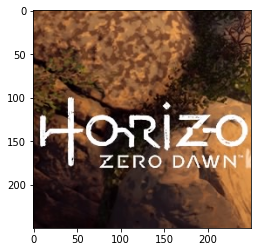

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", "supersecretke")
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))

scikit-image is a collection of algorithms for image processing and computer vision.

The Structural Similarity Index (SSIM) is a perceptual metric that quantifies image quality degradation* caused by processing such as data compression or by losses in data transmission.

In [ ]:
import skimage
from skimage.metrics import structural_similarity

numpy.squeeze() function is used when we want to remove single-dimensional entries from the shape of an array

In [ ]:
image = "HorizonZero"
ext = ".png"
key = "abcdefghijklm"

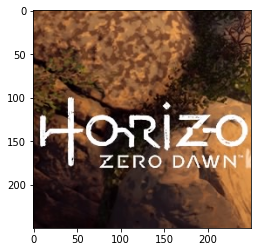

In [ ]:
LogisticEncryption(image + ext, key)
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))

In [ ]:
im.size

(250, 250)

In [ ]:
im=np.full((250,250,3), 12, np.uint8)

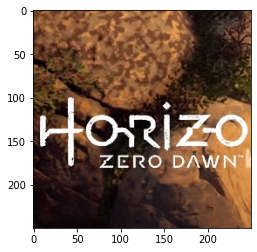

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", key)
im1 = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im1))

In [ ]:
im1.size

(250, 250)

In [ ]:
im1=np.full((250,250,3), 12, np.uint8)

In [ ]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [ ]:
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

In [ ]:
diff1=structural_similarity(im,im1)

Value as 1 refers that the encrypted and decrypted image remains the same. there is no loss of information

In [ ]:
diff1

1.0